### This notebook fits photon counting histograms (PCH)
Note that you need to have simulation.csv.zip from the sim_fcs simulation (or from experimental data) loaded into your workspace.
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/fit_pch.ipynb

In [1]:
#if you are using this from google colab, you need the utility modules
#(everything else should already be installed)
import os
if(not os.path.exists('pysimfcs_utils.py')):
    print('downloading pysimfcs libraries')
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/pysimfcs_utils.py
if(not os.path.exists('analysis_utils.py')):
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/analysis_utils.py
else:
    print('libraries already downloaded')

libraries already downloaded


In [2]:
#see fit_correlations for the descriptions of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis_utils as simutils
import scipy.optimize as so

In [3]:
simdf=pd.read_csv('simulation.csv.zip',index_col=0)

In [4]:
simdf.head()

,x,ch1,ch2
0,0.00000,0,0
1,0.00005,1,1
2,0.00010,3,3
3,0.00015,3,4
4,0.00020,1,3


In [5]:
simdf.max()

x      6.5536
ch1    8.0000
ch2    7.0000
dtype: float64

In [6]:
avgint=simdf['ch1'].mean()
nbbright=simdf['ch1'].var()/avgint-1
nbnum=avgint/nbbright
gval=0.3536
print('intensity',avgint,'brightness',nbbright/gval,'number',nbnum*gval)

intensity 0.5734710693359375 brightness 1.0018267495229523 number 0.5724253915250433


In [9]:
pch1,xvals=np.histogram(simdf['ch1'],bins=np.arange(11))
normpch1=pch1.astype(float)
totint=normpch1.sum()
normpch1/=totint
xvals=xvals[:-1]

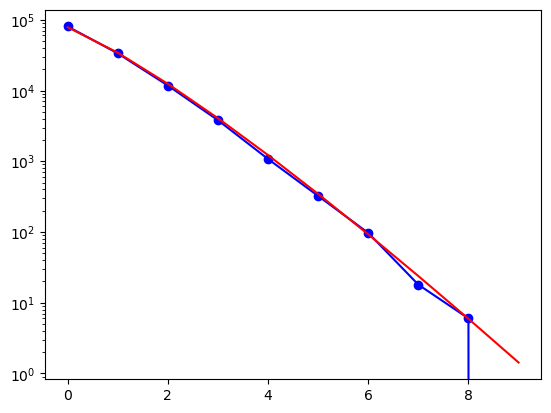

In [10]:
#params are background, brightness, and number
guessparams=[0.0,1.0,0.6]
fit=simutils.pchfunc(xvals,*guessparams)
plt.plot(xvals,pch1,'bo-')
plt.plot(xvals,fit*totint,'r-')
plt.yscale('log')

In [11]:
weights=simutils.getpchweights(pch1)

In [12]:
guessparams=[0.0001,1.0,0.6]
ulims=[0.01,10.0,10.0]
llims=[0.0,0.1,0.1]

In [13]:
weights

array([3.39281720e+05, 1.76155005e+05, 1.43999574e+05, 1.34989700e+05,
       1.32156906e+05, 1.31395798e+05, 1.31169072e+05, 1.31090002e+05,
       1.31078000e+05, 1.00000000e+00])

In [14]:
fparams,fcov=so.curve_fit(simutils.pchfunc,xvals,normpch1,
             p0=guessparams,sigma=1.0/weights,bounds=(llims,ulims),method='trf')
fit=simutils.pchfunc(xvals,*fparams)

In [15]:
fparams

array([0.01      , 1.01005703, 0.55740935])

Text(0, 0.5, 'frequency')

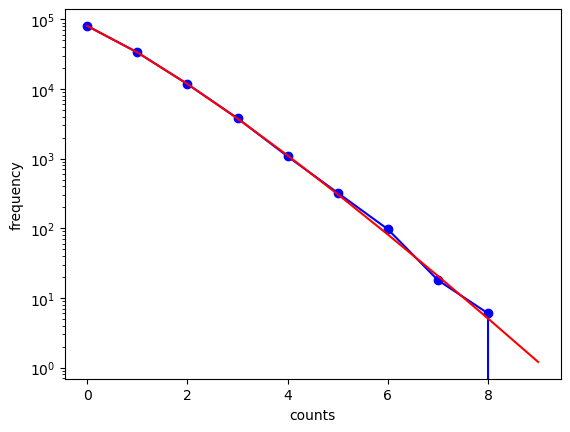

In [16]:
plt.plot(xvals,pch1,'bo-')
plt.plot(xvals,fit*totint,'r-')
plt.yscale('log')
plt.xlabel('counts')
plt.ylabel('frequency')